In [1]:
import time
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
galstar = pd.read_csv("data_and_information/galstar.csv")

In [3]:
galstar = galstar.iloc[:,1:]

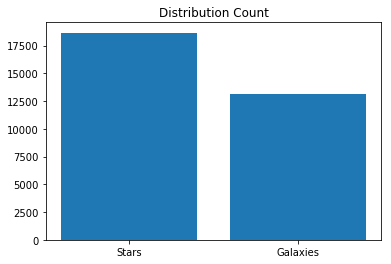

In [4]:
# keeps count of the number of times '0' or '1' appears in the labels column
star_count = 0
galaxy_count = 0
for i in range(len(galstar)):
    if galstar.iloc[i,0] == 0:
        star_count+=1
    elif galstar.iloc[i,0] == 1:
        galaxy_count +=1
        
y_pos = np.arange(2) #2 classes
plt.bar(y_pos, [star_count, galaxy_count])
plt.xticks(y_pos, ["Stars", "Galaxies"])
plt.title("Distribution Count")
plt.show()

In [5]:
galstar = galstar.sample(frac=1).reset_index(drop=True) #shuffles the data and resets the index for presentation purposes
galstar

,y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 5400,Unnamed: 5401,Unnamed: 5402,Unnamed: 5403,Unnamed: 5404,Unnamed: 5405,Unnamed: 5406,Unnamed: 5407,Unnamed: 5408,Unnamed: 5409
0,0,0.005276,0.005255,0.005360,0.005215,0.005321,0.005318,0.005250,0.005228,0.005292,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257,0.005257,0.005257
1,1,0.005242,0.005264,0.005281,0.005377,0.005205,0.005277,0.005316,0.005288,0.005245,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
2,0,0.005247,0.005267,0.005216,0.005161,0.005148,0.005318,0.005295,0.005244,0.005264,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
3,0,0.005303,0.005287,0.005222,0.005304,0.005320,0.005294,0.005265,0.005351,0.005309,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
4,0,0.005210,0.005295,0.005271,0.005253,0.005196,0.005282,0.005293,0.005194,0.005235,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257
5,0,0.005312,0.005274,0.005222,0.005345,0.005314,0.005274,0.005342,0.005209,0.005237,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
6,1,0.005284,0.005264,0.005322,0.005265,0.005305,0.005316,0.005274,0.005273,0.005376,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005257,0.005256,0.005256
7,0,0.005262,0.005258,0.005224,0.005228,0.005294,0.005298,0.005323,0.005233,0.005242,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257
8,0,0.005261,0.005359,0.005345,0.005341,0.005323,0.005172,0.005258,0.005357,0.005268,...,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256
9,1,0.005341,0.005319,0.005161,0.005261,0.005465,0.005323,0.005319,0.005328,0.005374,...,0.005256,0.005256,0.005257,0.005257,0.005257,0.005257,0.005257,0.005257,0.005256,0.005256


In [6]:
#puts label column into this variable "galstar_labels"
galstar_labels = galstar['y']
# puts all the pixel information for all observations into "galstar_images"
galstar_images = galstar.iloc[:,1:] 
print(galstar_labels.shape)

(31798,)


In [7]:
#676 pixels. Python start at 0 but it is exclusive of the last number
galstar_images_g = np.array(galstar_images.iloc[:,0:676]) #band 1 ('g')
galstar_images_r = np.array(galstar_images.iloc[:,676:1352]) #band 2 ('r')
galstar_images_i = np.array(galstar_images.iloc[:,1352:2028]) # band 3 ('i')
galstar_images_z = np.array(galstar_images.iloc[:,2028:2704]) # band 4 ('z')

In [8]:
# Here, I am defining a function that establishes the min_max_normalization
# The only input I give the function is the image and it is already in an array, so we dont need to 
# reshape it
def min_max_normalization(image_array):
    #What I am doing here is getting the max value and copying it x amount of times in a vector where 
    # x is the size of the array
    # Since it is an array of pixels, we are subtracting/dividing vectors so we need the single max values 
    # to ve a vector of that same max value
    max_pixel= np.repeat(image_array.max(axis=0), len(image_array)) 
    # Same thing but now we are doing it to find the min value
    min_pixel= np.repeat(image_array.min(axis=0), len(image_array))
    # This is the formula of "Min-Max Normalization"
    normalized_image = (image_array - min_pixel)/ (max_pixel - min_pixel)
    # I return back the normalized array and I have to return the variable that I saved the formulaic 
    # expression in
    return normalized_image

# Because there are 31,798 images, we have to loop through each one. So imagine "i" is an arrow going 
# down the list of all observations (rows) 
# We want to do the normalization per image independently so it will go one at a time until the end of 
# the list
for i in range(len(galstar_images_g)):
    # I stored it in a temporary variable just to make sure that the original wasnt affected yet, 
    # but it can easily taken out
    temp = galstar_images_g[i]
    #If the above line is taken out, we jsut replace temp with galstar_images_1[i]
    #This is also, where we call the normalization function with the individual array (from i) and 
    #then store those new values from what it returns back into the same spot
    galstar_images_g[i] = min_max_normalization(temp) 
    
for j in range(len(galstar_images_r)):
    temp = galstar_images_r[j]
    galstar_images_r[j] = min_max_normalization(temp)
    
for k in range(len(galstar_images_i)):
    temp = galstar_images_i[k]
    galstar_images_i[k] = min_max_normalization(temp)

for l in range(len(galstar_images_z)):
    temp = galstar_images_z[l]
    galstar_images_z[l] = min_max_normalization(temp)

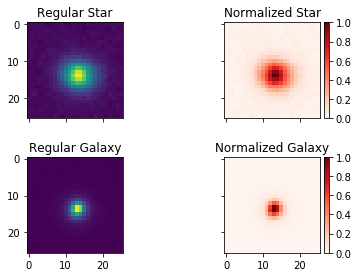

In [9]:
def add_colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.set_title("Regular Star")
ax1.imshow(np.reshape(galstar_images_i[0], (26,26)))

ax2.set_title("Normalized Star")
color_star = ax2.imshow(np.reshape(galstar_images_i[0], (26,26)), cmap='Reds')
add_colorbar(color_star)

ax3.set_title("Regular Galaxy")
ax3.imshow(np.reshape(galstar_images_i[1], (26,26)))

ax4.set_title("Normalized Galaxy")
color_galaxy=ax4.imshow(np.reshape(galstar_images_i[1], (26,26)), cmap='Reds')
add_colorbar(color_galaxy)

In [10]:
# Im going to define a 60-20-20 data split
# 60% training
# 20% testing
# 20% validations
total_classes = 2

def data_split(data):
    train_images = np.array(data[:int(len(data)*0.6)])
    train_labels = np.array(galstar_labels[:int(len(galstar_labels)*0.6)])
    randy1 = np.random.permutation(len(train_images))
    train_images = train_images[randy1]
    train_labels = train_labels[randy1]
    
    test_images = np.array(data[int(len(data)*0.6): int(len(data)*0.8)])
    test_labels = np.array(galstar_labels[int(len(galstar_labels)*0.6): int(len(galstar_labels)*0.8)])
    randy2 = np.random.permutation(len(test_images))
    test_images = train_images[randy2]
    test_labels = train_labels[randy2]
    
    valid_images = np.array(data[int(len(data)*0.8):])
    valid_labels = np.array(galstar_labels[int(len(galstar_labels)*0.8):])
    randy3 = np.random.permutation(len(valid_images))
    valid_images = train_images[randy3]
    valid_labels = train_labels[randy3]
    
    n1= len(train_labels)
    n2= len(test_labels)
    n3= len(valid_labels)
    
    train_images = train_images.reshape(n1,26,26,1)
    test_images = test_images.reshape(n2,26,26,1)
    valid_images = valid_images.reshape(n3,26,26,1)
    
    train_labels = np_utils.to_categorical(train_labels-1, total_classes) 
    test_labels = np_utils.to_categorical(test_labels-1, total_classes)
    valid_labels =  np_utils.to_categorical(valid_labels-1, total_classes)
    
    return train_images, test_images, valid_images, train_labels, test_labels, valid_labels

#splits the data for the g band
train_images_g, test_images_g, valid_images_g, train_labels_g, test_labels_g, valid_labels_g = data_split(galstar_images_g)
#splits the data for the r band
train_images_r, test_images_r, valid_images_r, train_labels_r, test_labels_r, valid_labels_r = data_split(galstar_images_r)
#splits the data for the i band
train_images_i, test_images_i, valid_images_i, train_labels_i, test_labels_i, valid_labels_i = data_split(galstar_images_i)
#splits the data for the z band
train_images_z, test_images_z, valid_images_z, train_labels_z, test_labels_z, valid_labels_z = data_split(galstar_images_z)
        
#print(train_images_g[1].shape)

In [16]:
def model_architecture(train_images, test_images, valid_images, train_labels, test_labels, valid_labels):
    begin = time.time()
    
    input_shape = Input(shape=(26,26,1))
    x= Conv2D(filters=32,kernel_size=(5,5),activation='relu', name='Conv1_5x5/1')(input_shape)
    x= Conv2D(filters=32,kernel_size=(3,3),activation='relu', padding='same', name='Conv2_3x3/1')(x)
    x= AveragePooling2D(pool_size=(2, 2), name='averagepool1_2x2/1')(x)
    x= Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same', name='Conv3_3x3/1')(x)
    x= Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same', name='Conv4_3x3/1')(x)
    x= Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same', name='Conv5_3x3/1')(x)
    x= AveragePooling2D(pool_size=(2, 2), name='averagepool2_2x2/1')(x)
    x= Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same', name='Conv6_3x3/1')(x)
    x= Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same', name='Conv7_3x3/1')(x)
    x= Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same', name='Conv8_3x3/1')(x)
    x= AveragePooling2D(pool_size=(2, 2), name='averagepool3_2x2/1')(x)
    x= Flatten()(x)
    x= Dense(2048, activation='relu', name='Dense1')(x)
    x= Dropout(0.5)(x)
    x= Dense(2048, activation='relu', name='Dense2')(x)
    x= Dense(2, activation='softmax', name='output')(x)

    model = Model(input_shape, x)
    model.summary()
    
    #changed learning rate to 0.01
    sgd = SGD(learning_rate=0.01, momentum=0.4, decay=0.01, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer= sgd, metrics=['accuracy'])
    history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=10, batch_size=50)
    test_history = model.predict(test_images, batch_size=256)
    end = time.time()
    
    #Prints the contents that the variable "history" holds from the model fitting line
    #print(history.history.keys())
  
    
    print('Total Time: {} seconds'.format(int(end-begin)))
    
    return history, test_history
    #print("Testing Loss:", history[0])
    #print 'Total Time ',int(end-begin),' seconds'

In [17]:
history_g, test_history_g = model_architecture(train_images_g, test_images_g, valid_images_g, train_labels_g, test_labels_g, valid_labels_g)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 26, 26, 1)         0         
_________________________________________________________________
Conv1_5x5/1 (Conv2D)         (None, 22, 22, 32)        832       
_________________________________________________________________
Conv2_3x3/1 (Conv2D)         (None, 22, 22, 32)        9248      
_________________________________________________________________
averagepool1_2x2/1 (AverageP (None, 11, 11, 32)        0         
_________________________________________________________________
Conv3_3x3/1 (Conv2D)         (None, 11, 11, 64)        18496     
_________________________________________________________________
Conv4_3x3/1 (Conv2D)         (None, 11, 11, 64)        36928     
_________________________________________________________________
Conv5_3x3/1 (Conv2D)         (None, 11, 11, 64)        3692

In [18]:
history_r, test_history_r = model_architecture(train_images_r, test_images_r, valid_images_r, train_labels_r, test_labels_r, valid_labels_r)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 26, 26, 1)         0         
_________________________________________________________________
Conv1_5x5/1 (Conv2D)         (None, 22, 22, 32)        832       
_________________________________________________________________
Conv2_3x3/1 (Conv2D)         (None, 22, 22, 32)        9248      
_________________________________________________________________
averagepool1_2x2/1 (AverageP (None, 11, 11, 32)        0         
_________________________________________________________________
Conv3_3x3/1 (Conv2D)         (None, 11, 11, 64)        18496     
_________________________________________________________________
Conv4_3x3/1 (Conv2D)         (None, 11, 11, 64)        36928     
_________________________________________________________________
Conv5_3x3/1 (Conv2D)         (None, 11, 11, 64)        3692

In [19]:
history_i, test_history_i = model_architecture(train_images_i, test_images_i, valid_images_i, train_labels_i, test_labels_i, valid_labels_i)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 26, 26, 1)         0         
_________________________________________________________________
Conv1_5x5/1 (Conv2D)         (None, 22, 22, 32)        832       
_________________________________________________________________
Conv2_3x3/1 (Conv2D)         (None, 22, 22, 32)        9248      
_________________________________________________________________
averagepool1_2x2/1 (AverageP (None, 11, 11, 32)        0         
_________________________________________________________________
Conv3_3x3/1 (Conv2D)         (None, 11, 11, 64)        18496     
_________________________________________________________________
Conv4_3x3/1 (Conv2D)         (None, 11, 11, 64)        36928     
_________________________________________________________________
Conv5_3x3/1 (Conv2D)         (None, 11, 11, 64)        3692

In [20]:
history_z, test_history_z = model_architecture(train_images_z, test_images_z, valid_images_z, train_labels_z, test_labels_z, valid_labels_z)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 26, 26, 1)         0         
_________________________________________________________________
Conv1_5x5/1 (Conv2D)         (None, 22, 22, 32)        832       
_________________________________________________________________
Conv2_3x3/1 (Conv2D)         (None, 22, 22, 32)        9248      
_________________________________________________________________
averagepool1_2x2/1 (AverageP (None, 11, 11, 32)        0         
_________________________________________________________________
Conv3_3x3/1 (Conv2D)         (None, 11, 11, 64)        18496     
_________________________________________________________________
Conv4_3x3/1 (Conv2D)         (None, 11, 11, 64)        36928     
_________________________________________________________________
Conv5_3x3/1 (Conv2D)         (None, 11, 11, 64)        3692

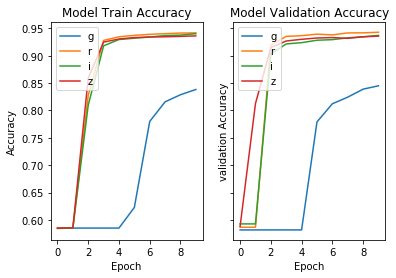

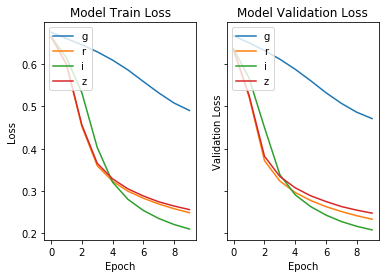

In [27]:
def Accuracy_Plot(history_g, history_r, history_i, history_z):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    ax1.plot(history_g.history['accuracy'])
    ax1.plot(history_r.history['accuracy'])
    ax1.plot(history_i.history['accuracy'])
    ax1.plot(history_z.history['accuracy'])
    ax1.set_title('Model Train Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['g','r','i','z'], loc='upper left')
    
    ax2.plot(history_g.history['val_accuracy'])
    ax2.plot(history_r.history['val_accuracy'])
    ax2.plot(history_i.history['val_accuracy'])
    ax2.plot(history_z.history['val_accuracy'])
    ax2.set_title('Model Validation Accuracy')
    ax2.set_ylabel('validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['g','r','i','z'], loc='upper left')
    
    fig.savefig("galstar_accuracy.png")

def Loss_Plot(history_g, history_r, history_i, history_z):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
    ax1.plot(history_g.history['loss'])
    ax1.plot(history_r.history['loss'])
    ax1.plot(history_i.history['loss'])
    ax1.plot(history_z.history['loss'])
    ax1.set_title('Model Train Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['g','r','i','z'], loc='upper left')
    
    ax2.plot(history_g.history['val_loss'])
    ax2.plot(history_r.history['val_loss'])
    ax2.plot(history_i.history['val_loss'])
    ax2.plot(history_z.history['val_loss'])
    ax2.set_title('Model Validation Loss')
    ax2.set_ylabel('Validation Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['g','r','i','z'], loc='upper left')
    
    fig.savefig("galstar_loss.png")
    
Accuracy_Plot(history_g, history_r, history_i, history_z)
Loss_Plot(history_g, history_r, history_i, history_z)

In [22]:
def plot_confusion_matrix(cm,target_names, title='Confusion matrix',cmap=None, normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    recall = cm[0][0] / float(cm[0][0]+cm[0][1])
    precision = cm[0][0] / float(cm[0][0]+cm[1][0])


    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\nAccuracy={:0.4f}; Error={:0.4f}; Precision={:0.4f},Recall={:0.4f},  '.format(accuracy, misclass, precision, recall))
    plt.show()
    
def pred_actual(predicted_labels, true_labels, name):
    predictions = []
    for i in range(len(predicted_labels)):
        max_value = max(predicted_labels[i])
        if predicted_labels[i,0] == max_value:
            predictions.append(0)
        elif predicted_labels[i,1] == max_value:
            predictions.append(1)
        
    actual = []
    for i in range(len(true_labels)):
        if true_labels[i,0] == 1:
            actual.append(0)
        elif true_labels[i,1] == 1:
            actual.append(1)
    
    cm(actual, predictions, name)

def cm(actual, predictions, name):
    conf_mat = confusion_matrix(actual, predictions)
    plot = plot_confusion_matrix(conf_mat, target_names=["Star", "Galaxy"], title=name)

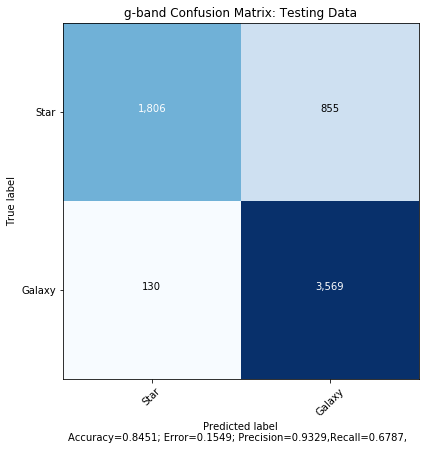

(6360, 2)
(6360, 2)


In [23]:
plot_g = pred_actual(test_history_g, test_labels_g, name= "g-band Confusion Matrix: Testing Data")
print(test_history_g.shape)
print(test_labels_g.shape)

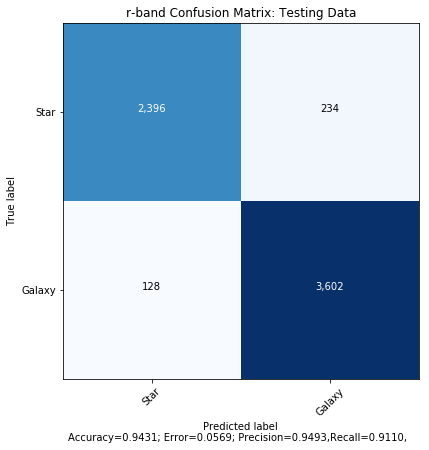

In [24]:
plot_r = pred_actual(test_history_r, test_labels_r, name= "r-band Confusion Matrix: Testing Data")

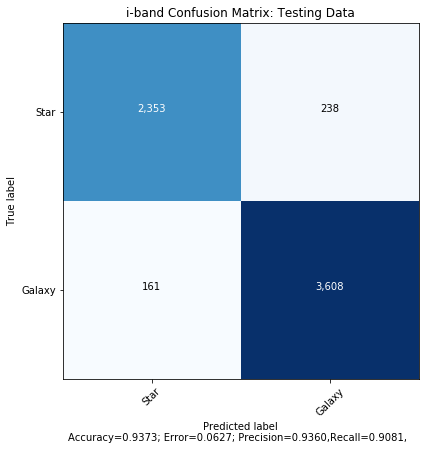

In [25]:
plot_i = pred_actual(test_history_i, test_labels_i, name= "i-band Confusion Matrix: Testing Data")

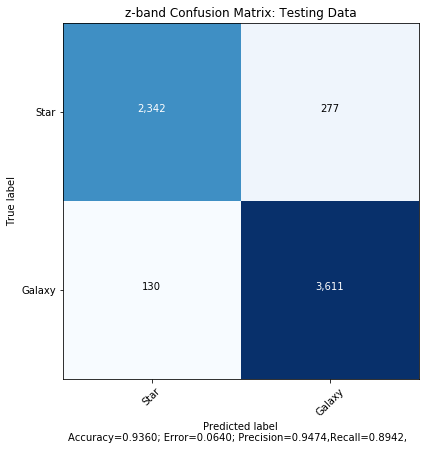

In [26]:
plot_z = pred_actual(test_history_z, test_labels_z, name= "z-band Confusion Matrix: Testing Data")